# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 12.5 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [https://contest.yandex.ru/contest/72492] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим три простых двумерных датасета сделанных с помощью `make_moons`, `make_circles`, `make_classification` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

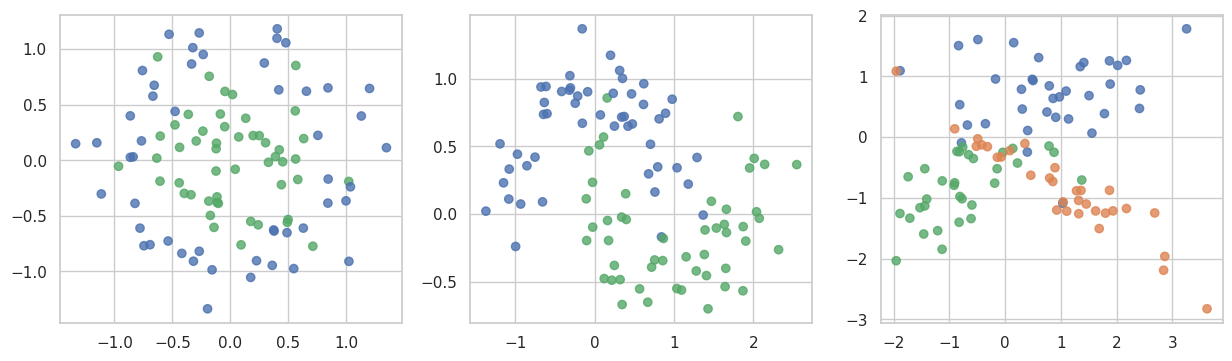

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

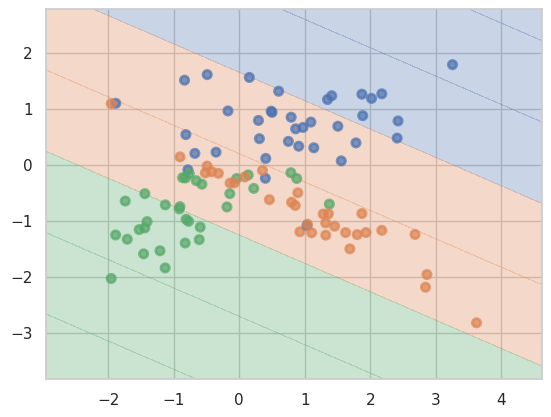

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Train accuracy: 1.0
Test accuracy: 0.84


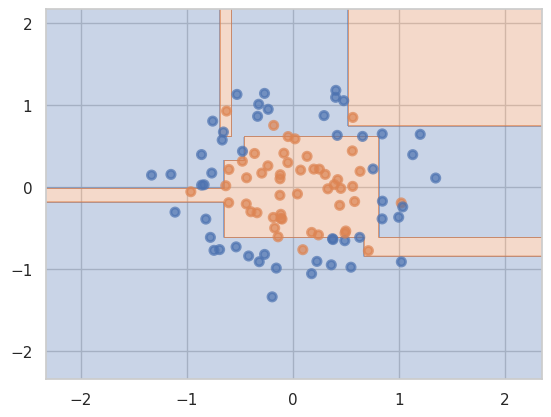

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X, y = datasets[0]
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=1377)
clf = DecisionTreeClassifier(random_state=228)
clf = clf.fit(X_train, y_train.astype('int'))
plot_surface(clf, X, y)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 0.88


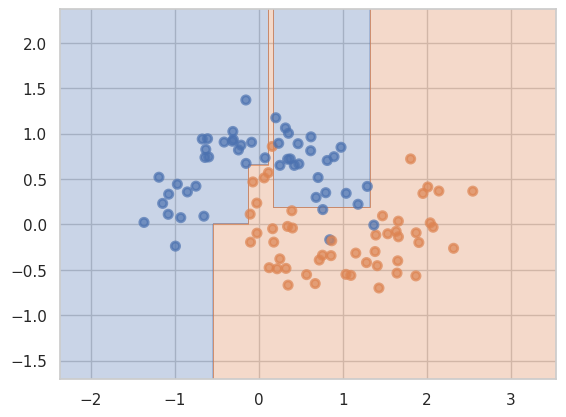

In [ ]:
X, y = datasets[1]
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=1377)
clf = DecisionTreeClassifier(random_state=228)
clf = clf.fit(X_train, y_train.astype('int'))
plot_surface(clf, X, y)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 0.8


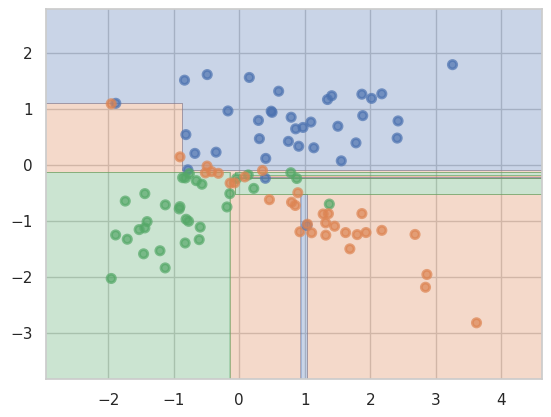

In [ ]:
X, y = datasets[2]
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=1377)
clf = DecisionTreeClassifier(random_state=228)
clf = clf.fit(X_train, y_train.astype('int'))
plot_surface(clf, X, y)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

__Ответ:__ Да, сильно. Как мы видим accuracy на обучающей выборке везде равна 1, при том что на графиках мы видим явные аномалии, например:
- Выборка 1: удлиненные области отходящие от центральной и 2 области отсоединенные от центральной.
- Выборка 2: вертикальная узкая область.
- Выборка 3: Область оранжевого типа слева, зеленого справа, синего снизу.
Эти наблюдения дают основание предположить сильную переобученность.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки / accuracy. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки.

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

In [ ]:
import plotly.graph_objects as go
for data_n in range(3):
  X, y = datasets[data_n]
  X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=1377)

  fig = go.Figure()

  fig.add_trace(go.Scatter(
        x=X_train[:, 0],
        y=X_train[:, 1],
        mode='markers',
        marker=dict(color=y_train, symbol= 'triangle-up', colorscale='Plasma', line_width=0.5),
        name='Train dataset'
    ))

  fig.add_trace(go.Scatter(
        x=X_test[:, 0],
        y=X_test[:, 1],
        mode='markers',
        marker=dict(color=y_test, symbol = 'triangle-down', colorscale='Plasma', line_width=0.5),
        name='Test dataset'
  ))

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

  clf = DecisionTreeClassifier(random_state=228, max_depth=2, min_samples_leaf=2)
  clf = clf.fit(X_train, y_train.astype('int'))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  fig.add_trace(go.Contour(
        x=xx[0],
        y=yy[:, 0],
        z=Z,
        showscale=False,
        colorscale='Plasma',
        opacity=0.5
    ))

  steps = []
  for max_depth in range(2, 22, 4):
    for min_samples_leaf in range(1, 10, 2):
      clf = DecisionTreeClassifier(random_state=228, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
      clf = clf.fit(X_train, y_train.astype('int'))

      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      steps.append(dict(
          method='update',
          args=[{"z": [Z]}, {"annotations": [ dict( text=f"Train Accuracy: " +  str(accuracy_score(y_train, clf.predict(X_train))) + "; Test Accuracy: " + str(accuracy_score(y_test, clf.predict(X_test))))]}],
          label = str(max_depth) + "/" + str(min_samples_leaf)
      ))




  sliders = [dict(
    active=0,
    currentvalue={"prefix": "Hyperparameters max_depth/min_samples_leaf: "},
    pad={"t": 50},
    steps=steps
  )]

  fig.update_layout(
        sliders=sliders,
        title="Decision Tree",
  )
  fig.show()

__Ответ:__ При росте глубины падает обобщая способность, но растет уровень обучения. В случае листьев наоборот, чем их меньше, тем сильнее обучено. На разных датасетах мы видим разные картины, в некоторых одни параметры подходят идеально, а в других дают переобучение. В итоге, как и всегда для нахождения оптимальных гиперпараметров необходимо использовать cv или валидационную выборку.

Это происходит из-за разных расположений признаков, так например "луны" описать прямыми линиями сложнее, чем вложенные круги, а последний случай и того хуже, где они еще и пересекаются в центре. Помимо того, разные датасеты дают разные выбросы, которые влияют на обобщающую способность модели, так на лунах я не нашел оптимального параметра, при котором "на глаз" плоскость разбита правильно.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/72492/run-report/129858634/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
df = pd.read_csv('students.csv')
df.sample(5)

STG   SCG   STR   LPR   PEG  UNS
180  0.37  0.68  0.10  0.63  0.18    0
226  0.71  0.48  0.13  0.23  0.59    1
17   0.10  0.25  0.10  0.08  0.33    0
217  0.60  0.31  0.31  0.87  0.58    1
149  0.48  0.30  0.15  0.65  0.77    1

In [ ]:
from hw5code import find_best_split
X = df.drop(columns='UNS')
y = df['UNS']

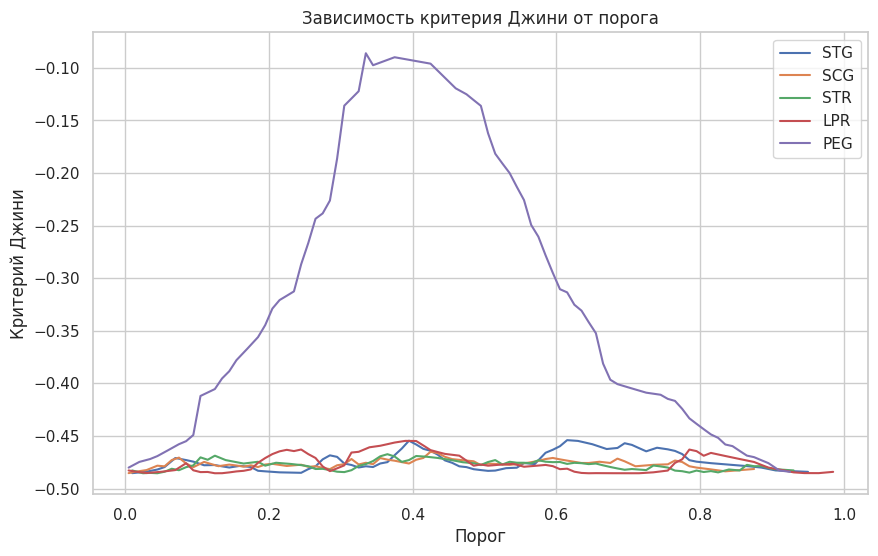

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Зависимость критерия Джини от порога')
ax.set_xlabel('Порог')
ax.set_ylabel('Критерий Джини')
for i in X.columns:
  thresholds, ginis, threshold_best, gini_best = find_best_split(X[i].to_numpy(), y.to_numpy())
  ax.plot(thresholds, ginis, label = i)
ax.legend()

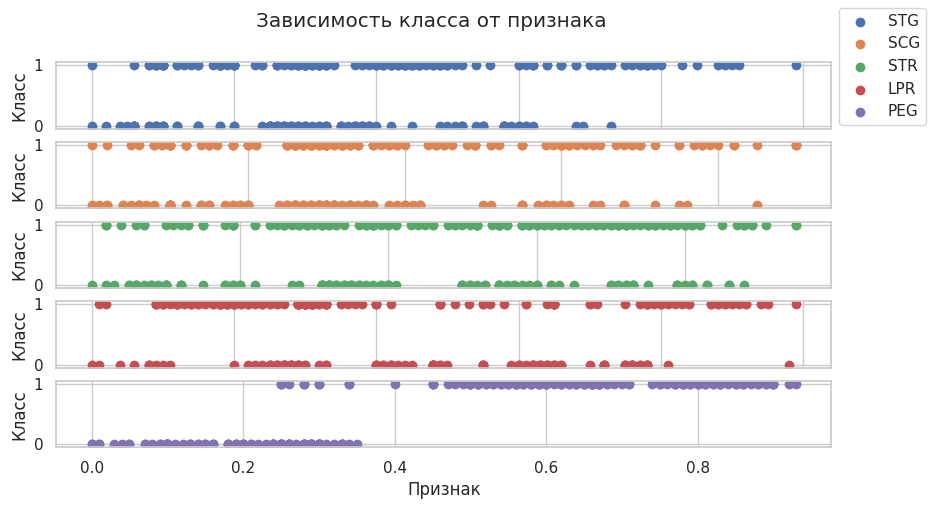

In [ ]:
fig, ax = plt.subplots(5, figsize=(10,5))
palette = sns.color_palette(n_colors = 5)
fig.suptitle('Зависимость класса от признака')
for i in range(5):
  ax[i].set_xlabel('Признак')
  ax[i].set_ylabel('Класс')
  ax[i].scatter(X[X.columns[i]], y, label = X.columns[i], c = palette[i])
fig.legend()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Самое высокое значение Джини наблюдается у PEG, при пороге в районе 0.4. И это отлично согласуется с scatter-графиком, так как при этом пороге как раз слева от него в основном класс 0, а с права в основном класс 1.

Вид кривой хороших признаков я бы описал как парабола ветви вниз или другая похожая функция с 1 максимумом и убывающая по обе стороны от него.

Кривые плохих признаков отличаются колебаниями, "выпуклостью вниз".

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
df = pd.read_csv("agaricus-lepiota.data")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
  df[i] = le.fit_transform(df[i])

In [ ]:
from hw5code import DecisionTree
X = df.drop(columns='p')
y = df['p']
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.5, random_state=1377)

In [ ]:
feature_types = ['categorical']*X.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train.to_numpy(), y_train.to_numpy())

In [ ]:
print("Train accuracy:", accuracy_score(y_train, tree.predict(X_train.to_numpy())))
print("Test accuracy:", accuracy_score(y_test, tree.predict(X_test.to_numpy())))

Train accuracy: 1.0
Test accuracy: 1.0


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (https://github.com/esokolov/ml-course-hse/blob/master/2024-fall/homework-practice/homework-practice-05-trees/tic-tac-toe-endgame.csv).

In [ ]:
df = pd.read_csv("tic-tac-toe-endgame.csv")

In [ ]:
df.sample(4)

V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
462  o  b  o  x  x  x  b  x  o  positive
167  x  o  o  x  b  b  x  x  o  positive
242  x  b  o  x  x  o  x  o  b  positive
123  x  o  x  o  x  o  x  x  o  positive

In [ ]:
le = LabelEncoder()
for i in df.columns:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.sample(4)

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10
683   2   1   2   1   1   0   2   1   2    0
69    2   2   2   0   0   1   2   1   1    1
184   2   1   1   0   2   0   0   0   2    1
944   2   2   1   1   1   2   2   1   2    0

In [ ]:
X = df.drop(columns='V10').to_numpy()
y = df['V10'].to_numpy()
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.5, random_state=1377)
feature_types = ['categorical']*X.shape[1]

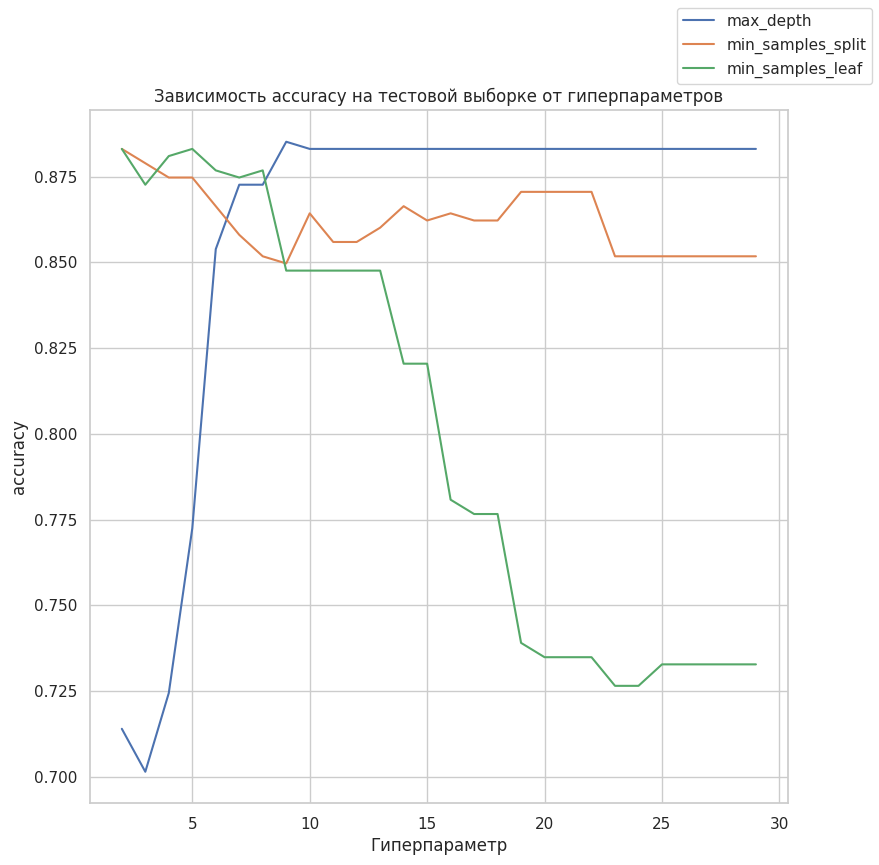

In [ ]:
fig, axes = plt.subplots(figsize=[9,9])
acmd = []
acms = []
acml = []
linspace = np.arange(2, 30, 1)
for i in linspace:
  tree = DecisionTree(feature_types, max_depth = i)
  tree.fit(X_train, y_train)
  acmd.append(accuracy_score(y_test, tree.predict(X_test)))
  tree = DecisionTree(feature_types, min_samples_split = i)
  tree.fit(X_train, y_train)
  acms.append(accuracy_score(y_test, tree.predict(X_test)))
  tree = DecisionTree(feature_types, min_samples_leaf = i)
  tree.fit(X_train, y_train)
  acml.append(accuracy_score(y_test, tree.predict(X_test)))

axes.plot(linspace, acmd, label = 'max_depth')
axes.plot(linspace, acms, label = 'min_samples_split')
axes.plot(linspace, acml, label = 'min_samples_leaf')

axes.set_title("Зависимость accuracy на тестовой выборке от гиперпараметров")
axes.set_xlabel("Гиперпараметр")
axes.set_ylabel("accuracy")

fig.legend()


__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Перебираете все пороги
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [ ]:
from hw5code import LinearRegressionTree
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target
X, _, y, _ = train_test_split(X, y, test_size=0.6, random_state=1377)
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=1377)

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.4, random_state=1377)
X_val, X_test, y_val,  y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1377)

In [ ]:
from sklearn.metrics import mean_squared_error
best_mse_mine = np.inf
best_param_mine = [3, 3, 3]
best_mse_sk = np.inf
best_param_sk = [3, 3, 3]

for max_depth in [3, 5]: #сомнительный перебор, но мой комп просто не вывез больший, извините
  for min_samples_leaf in [8, 12]:
    for min_samples_split in [8, 12]:
      tree = LinearRegressionTree(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
      dtr = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
      tree.fit(X_train, y_train)
      dtr.fit(X_train, y_train)
      mse_mine = mean_squared_error(y_val, tree.predict(X_val))
      mse_sk = mean_squared_error(y_val, dtr.predict(X_val))
      if mse_mine < best_mse_mine:
        best_mse_mine = mse_mine
        best_param_mine = [max_depth, min_samples_leaf, min_samples_split]
      if mse_sk < best_mse_sk:
        best_mse_sk = mse_sk
        best_param_sk = [max_depth, min_samples_leaf, min_samples_split]

In [ ]:
tree = LinearRegressionTree(max_depth=best_param_mine[0], min_samples_leaf=best_param_mine[1], min_samples_split=best_param_mine[2])
dtr = DecisionTreeRegressor(max_depth=best_param_sk[0], min_samples_leaf=best_param_sk[1], min_samples_split=best_param_sk[2])
tree.fit(X_train, y_train)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8)

In [ ]:
print("Mine:")
print("MSE_Train:", mean_squared_error(y_train, tree.predict(X_train)))
print("MSE_Test:", mean_squared_error(y_test, tree.predict(X_test)))
print("Sklearn:")
print("MSE_Train:", mean_squared_error(y_train, dtr.predict(X_train)))
print("MSE_Test:", mean_squared_error(y_test, dtr.predict(X_test)))

Mine:
MSE_Train: 0.43076758248823926
MSE_Test: 0.703287903433864
Sklearn:
MSE_Train: 0.44464591017813276
MSE_Test: 0.49235328508067955


Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [ ]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

tree = LinearRegressionTree(max_depth = 7)
dtr = DecisionTreeRegressor(max_depth = 7)

tree.fit(x_train, y_train)
dtr.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=7)

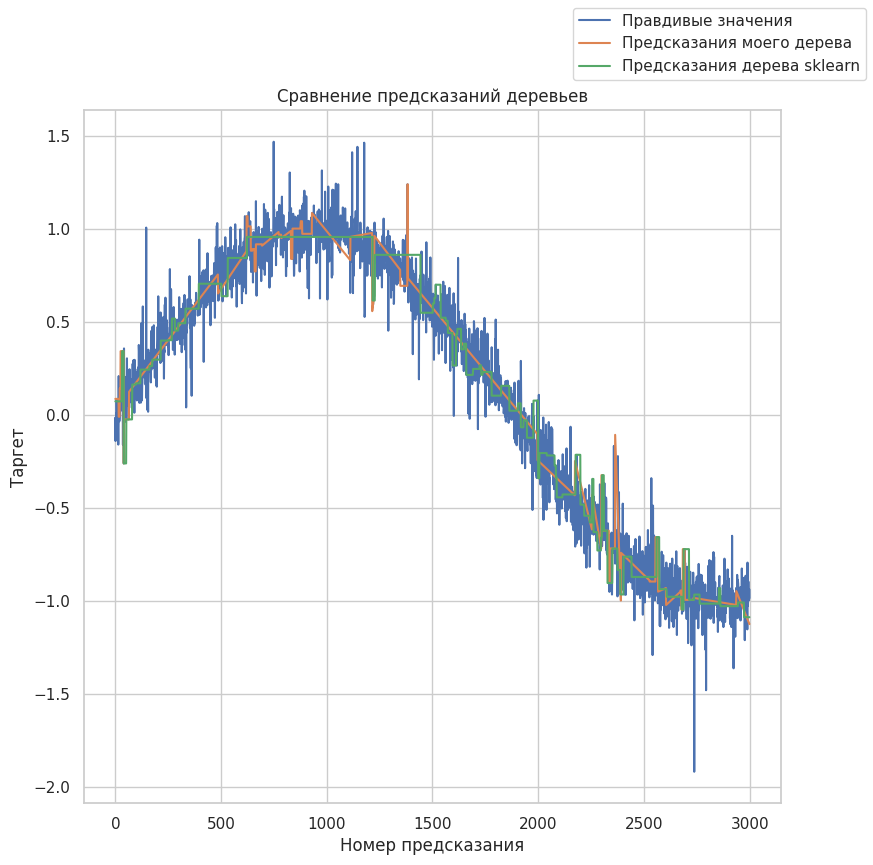

In [ ]:
fig, axes = plt.subplots(figsize=[9,9])
axes.set_title("Сравнение предсказаний деревьев")
axes.set_xlabel("Номер предсказания")
axes.set_ylabel("Таргет")
axes.plot(y, label = 'Правдивые значения')
axes.plot(tree.predict(x), label = 'Предсказания моего дерева')
axes.plot(dtr.predict(x), label = 'Предсказания дерева sklearn')
fig.legend()

**Ответ:** Дольше учится и сильнее переобучается.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

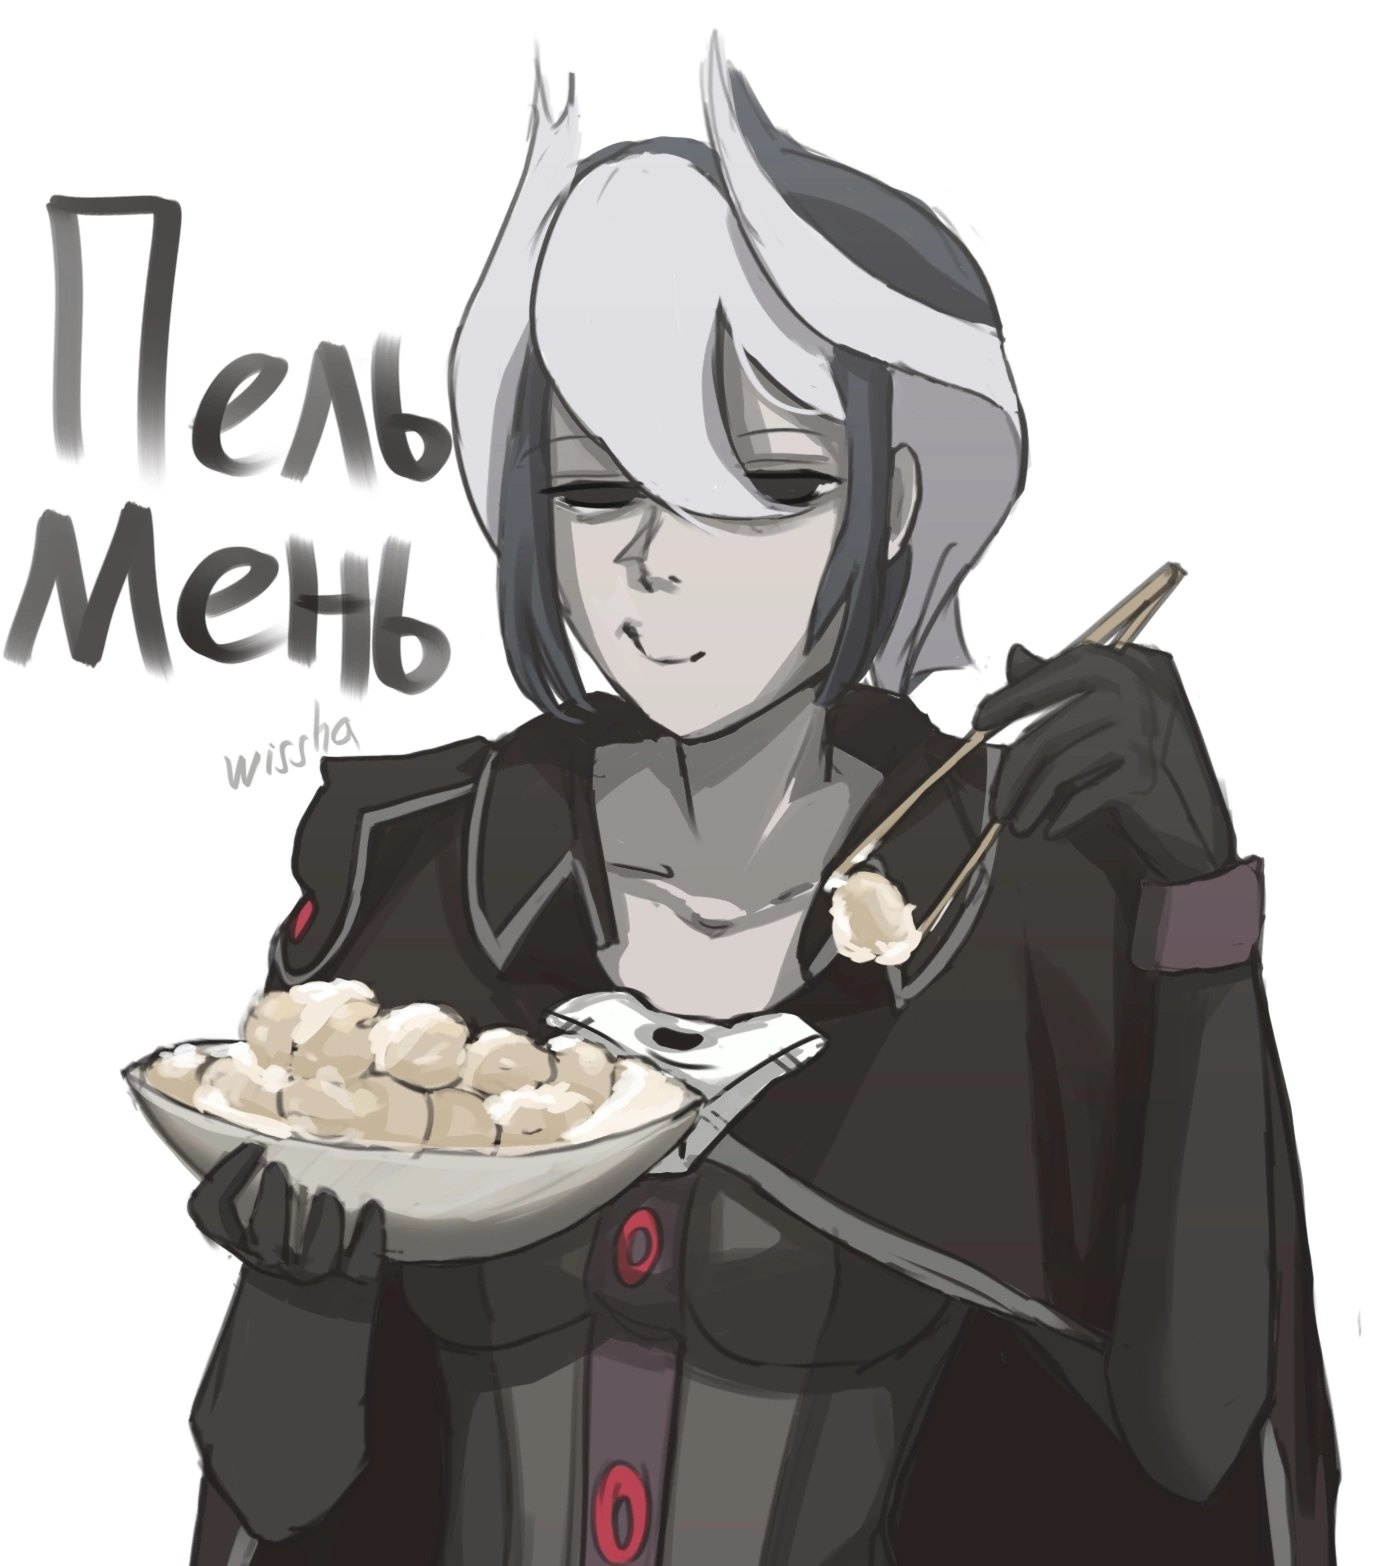